In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [6]:
#load the dataset
df=pd.read_csv('car_age_price.csv')

In [7]:
#show data with heading
df.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [8]:
#to find the shape of the data
df.shape

(112, 2)

In [9]:
#to find the statistical summary of the data
df.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [10]:
#to find the structure of a dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [11]:
#checking null values
df.isna().sum()

Year     0
Price    0
dtype: int64

In [24]:
#split the data into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(df[['Year']],df['Price'],test_size=0.25,random_state=42)

In [25]:
#create a linear regression model and fit it to the training data
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [26]:
#make predictions using the linear regression model
y_pred_lr=lr.predict(x_test)

In [27]:
#calculate the mean squared error and R-squared score for the Lasso regression model
mse_lr =mean_squared_error(y_test,y_pred_lr)
r2_lr =r2_score(y_test,y_pred_lr)

In [29]:
# Print the results for the linear regression model
print('Linear Regression Model')
print('Mean Squared Error:', mse_lr)
print('R-squared Score:', r2_lr)

Linear Regression Model
Mean Squared Error: 3878767151.0731072
R-squared Score: 0.4347961632108521


In [30]:
# Create a Lasso regression model and fit it to the training data
lasso = Lasso(alpha=0.01)
lasso.fit(x_train, y_train)

Lasso(alpha=0.01)

In [31]:
# Make predictions using the Lasso regression model
y_pred_lasso = lasso.predict(x_test)


In [32]:
# Calculate the mean squared error and R-squared score for the Lasso regression model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)


In [33]:
# Print the results for the Lasso regression model
print('Lasso Regression Model')
print('Mean Squared Error:', mse_lasso)
print('R-squared Score:', r2_lasso)

Lasso Regression Model
Mean Squared Error: 3878766838.5196795
R-squared Score: 0.43479620875532277


In [34]:
# Make a prediction for the price of a 2022 model second-hand grand i10 using the linear regression model
year = 2022
price_pred_lr = lr.predict([[year]])
print('Predicted Price (Linear Regression):', price_pred_lr[0])

Predicted Price (Linear Regression): 740160.1193776578


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [35]:
# Make a prediction for the price of a 2022 model second-hand grand i10 using the Lasso regression model
price_pred_lasso = lasso.predict([[year]])
print('Predicted Price (Lasso Regression):', price_pred_lasso[0])

Predicted Price (Lasso Regression): 740160.0977538973


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


<AxesSubplot:>

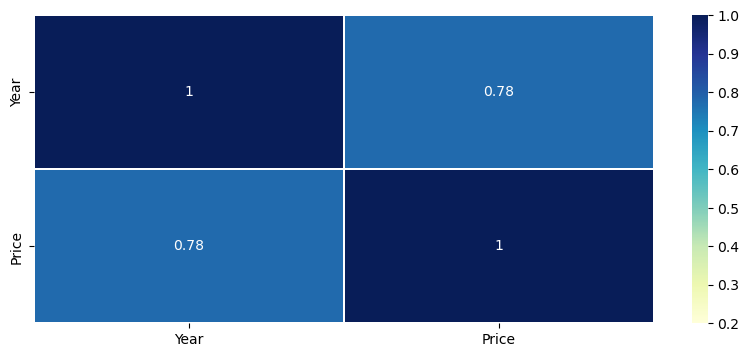

In [23]:
#to check correlation
corrmatrix =df.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,annot=True,vmin=0.2,vmax=1,linewidth=0.3,cmap='YlGnBu')

# price and year are highly correlated.it implies best linear relationship.

In [36]:
#r-squared value for two models
r_squared_1 =0.4347961632108521
r_squared_2=.43479620875532277

In [38]:
#compare the r^2 values
if r_squared_1 > r_squared_2:
    print("Linear Regression is performing better with an R-squared value of:", r_squared_1)
else:
    print("Lasso regression is performing better with an R-squared value of:", r_squared_2)

Lasso regression is performing better with an R-squared value of: 0.43479620875532277
